In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.layers import BatchNormalization

In [6]:
import keras
from sklearn.utils import shuffle

In [7]:
from PIL import Image
import glob

In [15]:
x_train=[]
y_train=[]
for i in range(1,10):
    s=""
    for filename in glob.glob('MRL/mrlEyes_2018_01/s000'+str(i)+'/*.png'):
        s=filename[26:]
        img=Image.open('MRL/mrlEyes_2018_01/s000'+str(i)+'/'+s)
        img=img.resize((80,80))
        x_train.append(np.array(img))
        y_train.append(int(s[16]))
    print(i)

1
2
3
4
5
6
7
8
9


In [16]:
for i in range(10,38):
    s=""
    for filename in glob.glob('MRL/mrlEyes_2018_01/s00'+str(i)+'/*.png'):
        s=filename[26:]
        img=Image.open('MRL/mrlEyes_2018_01/s00'+str(i)+'/'+s)
        img=img.resize((80,80))
        x_train.append(np.array(img))
        y_train.append(int(s[16]))
    s=np.array(s,dtype=str)
    print(i)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [17]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [18]:
x_train.shape,y_train.shape

((84898, 80, 80), (84898,))

In [19]:
np.sum(y_train)

42952

In [35]:
n=828

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[1. 0.]')

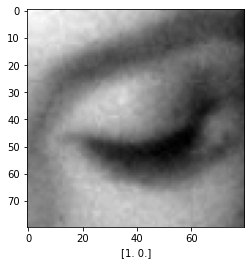

In [36]:
plt.imshow(x_train[n],cmap='gray')
plt.xlabel(y_train[n])

In [28]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_train, y_train = shuffle(x_train, y_train, random_state=0)

In [29]:
x_validation=x_train[50000:60000]
y_validation=y_train[50000:60000]
x_test=x_train[60000:84898]
y_test=y_train[60000:84898]
x_train=x_train[0:50000]
y_train=y_train[0:50000]

In [30]:
number_cat=2
y_train = keras.utils.to_categorical(y_train, number_cat)
y_validation = keras.utils.to_categorical(y_validation, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [31]:
x_train=x_train.reshape((-1,80,80,1))

In [32]:
x_validation=x_validation.reshape((-1,80,80,1))
x_test=x_test.reshape((-1,80,80,1))

In [33]:
x_train.shape,y_train.shape,x_validation.shape,y_validation.shape,x_test.shape,y_test.shape

((50000, 80, 80, 1),
 (50000, 2),
 (10000, 80, 80, 1),
 (10000, 2),
 (24898, 80, 80, 1),
 (24898, 2))

In [39]:
model = Sequential()
model.add(BatchNormalization(input_shape=(80,80,1)))
model.add(Conv2D(16, (3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(16, (5,5) ,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, (5,5),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, (5,5),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 80, 80, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 78, 78, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 16)        6416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 17, 17, 16)       

In [41]:
model.compile(loss = "categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics = ["accuracy"])

In [42]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 64 , validation_data = (x_validation, y_validation), verbose = 1)

Epoch 1/8
782/782 [==============================] - 281s 359ms/step - loss: 0.1734 - accuracy: 0.9355 - val_loss: 0.0892 - val_accuracy: 0.9739
Epoch 2/8
782/782 [==============================] - 266s 340ms/step - loss: 0.0786 - accuracy: 0.9725 - val_loss: 0.0573 - val_accuracy: 0.9769
Epoch 3/8
782/782 [==============================] - 266s 340ms/step - loss: 0.0650 - accuracy: 0.9772 - val_loss: 0.0579 - val_accuracy: 0.9793
Epoch 4/8
782/782 [==============================] - 264s 337ms/step - loss: 0.0542 - accuracy: 0.9808 - val_loss: 0.0420 - val_accuracy: 0.9853
Epoch 5/8
782/782 [==============================] - 265s 339ms/step - loss: 0.0477 - accuracy: 0.9831 - val_loss: 0.0404 - val_accuracy: 0.9872
Epoch 6/8
782/782 [==============================] - 306s 391ms/step - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.0413 - val_accuracy: 0.9854
Epoch 7/8
782/782 [==============================] - 284s 363ms/step - loss: 0.0427 - accuracy: 0.9848 - val_loss: 0.0406 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

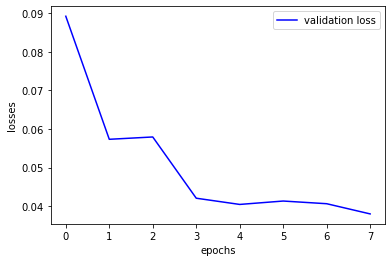

In [43]:
plt.plot(history.history['val_loss'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("losses")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

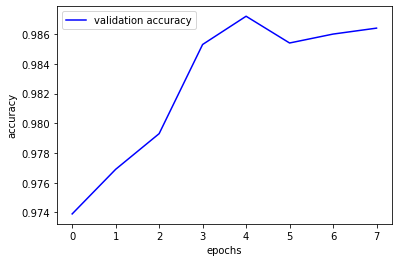

In [44]:
plt.plot(history.history['val_accuracy'], "b", label = "validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [45]:
evaluation = model.evaluate(x_test, y_test)
print("test accuracy: {}" .format(evaluation[1]))

779/779 [==============================] - 31s 40ms/step - loss: 0.0414 - accuracy: 0.9859
test accuracy: 0.9858623147010803


In [46]:
model.save("MRL.h5")

In [47]:
import cv2

In [56]:
cap = cv2.VideoCapture(700)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
l=['closed','open']
while(cap.isOpened()):
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        im=gray[y+h//4: y+h//2,x+w//8:x+w//2]
        im=Image.fromarray(im)
        im=im.resize((80,80))
        im=np.array(im)
        im=im.reshape(1,80,80,1)
        p = model.predict_classes(im)
        overlay_text = "%s " % (l[p[0]])
        cv2.rectangle(frame, (x+w//8, y+h//4), (x+w//2, y+h//2), (255, 0, 0), 2)
        cv2.putText(frame, overlay_text, (x+w//6, y+h//4), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()